In [ ]:
import pandas as pd 
import seaborn as sns
import numpy as np
import  matplotlib.pyplot as plt

In [ ]:
input_data = pd.read_excel(r'/Users/dylan/Github repo/DataBase/signal_process/benchmark_result-30_5.xlsx')

In [ ]:

# 相关性检验
import heapq
def correlation(value):
    input_pivot = input_data.pivot_table(index = 'start_date',columns = 'model',values = value)
    correlation_list = [input_pivot['benchmark'].corr(input_pivot[model],'spearman') for model in input_pivot.columns]
    del correlation_list[-1]
    index = map(correlation_list.index, heapq.nsmallest(3, correlation_list)) 
    return list(index)

In [ ]:

correlation('pc_ratio_sp')


In [ ]:
correlation('sharpe_ratio_sp')

In [ ]:
correlation('annual_return_sp')

In [ ]:
correlation('sp_rank')

In [ ]:
# 选择模型 2日开盘价持续下跌-1121-lr 探究
input_pivot = input_data.pivot_table(index = 'start_date',columns = 'model',values = 'sharpe_ratio_sp')

input_pivot = input_pivot[['benchmark','2日开盘价持续下跌-1131-rfc']]
ax1 = sns.lineplot(data = input_pivot)

# 拉长x
plt.xticks(rotation=-15)
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
N = len(input_pivot['benchmark']) # 注意此处N的值
# maxsize = max([t.get_window_extent().width for t in tl])
maxsize = 20 # 可以更改
m = 0.2  # inch margin
s = maxsize / plt.gcf().dpi * N + 2 * m
margin = m / plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left=margin, right=1. - margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])



In [ ]:
# 1
input_pivot = input_data.pivot_table(index = 'start_date',columns = 'model',values = 'sharpe_ratio_sp')
for model in input_pivot.columns :
    input_pivot_filter = input_pivot[['benchmark',model]]
    sns.lineplot(data = input_pivot_filter)
    # 拉长x
    plt.xticks(rotation=-15)
    plt.gca().margins(x=0)
    plt.gcf().canvas.draw()
    tl = plt.gca().get_xticklabels()
    N = len(input_pivot['benchmark']) # 注意此处N的值
    # maxsize = max([t.get_window_extent().width for t in tl])
    maxsize = 20 # 可以更改
    m = 0.2  # inch margin
    s = maxsize / plt.gcf().dpi * N + 2 * m
    margin = m / plt.gcf().get_size_inches()[0]
    plt.gcf().subplots_adjust(left=margin, right=1. - margin)
    plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])


In [ ]:
""" # 距离选择
def get_value(x):
    value = x['sharpe_ratio_sp'] - x[x['model'] == 'benchmark']['sharpe_ratio_sp']
    return value
input_data['value'] = input_data.groupby(by = 'start_date')[['model','sharpe_ratio_sp']].transform(get_value)

df = input_data.groupby(by = 'start_date').get_group('2018-05-01')
df[df['model'] == 'benchmark']['sharpe_ratio_sp'] """

In [ ]:
# 距离选择
def get_value(x):
    value = x['sharpe_ratio_sp'] - x[x['model'] == 'benchmark']['sharpe_ratio_sp'].iat[0] # 返回一个序列
    return value
input_data['value'] = list(input_data.groupby('start_date').apply(get_value)) # 转为list




<ipython-input-158-4efd9bf107c2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['c']= 'benchmark'
/Users/dylan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dylan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dylan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30424 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dylan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20215 missing from current font.


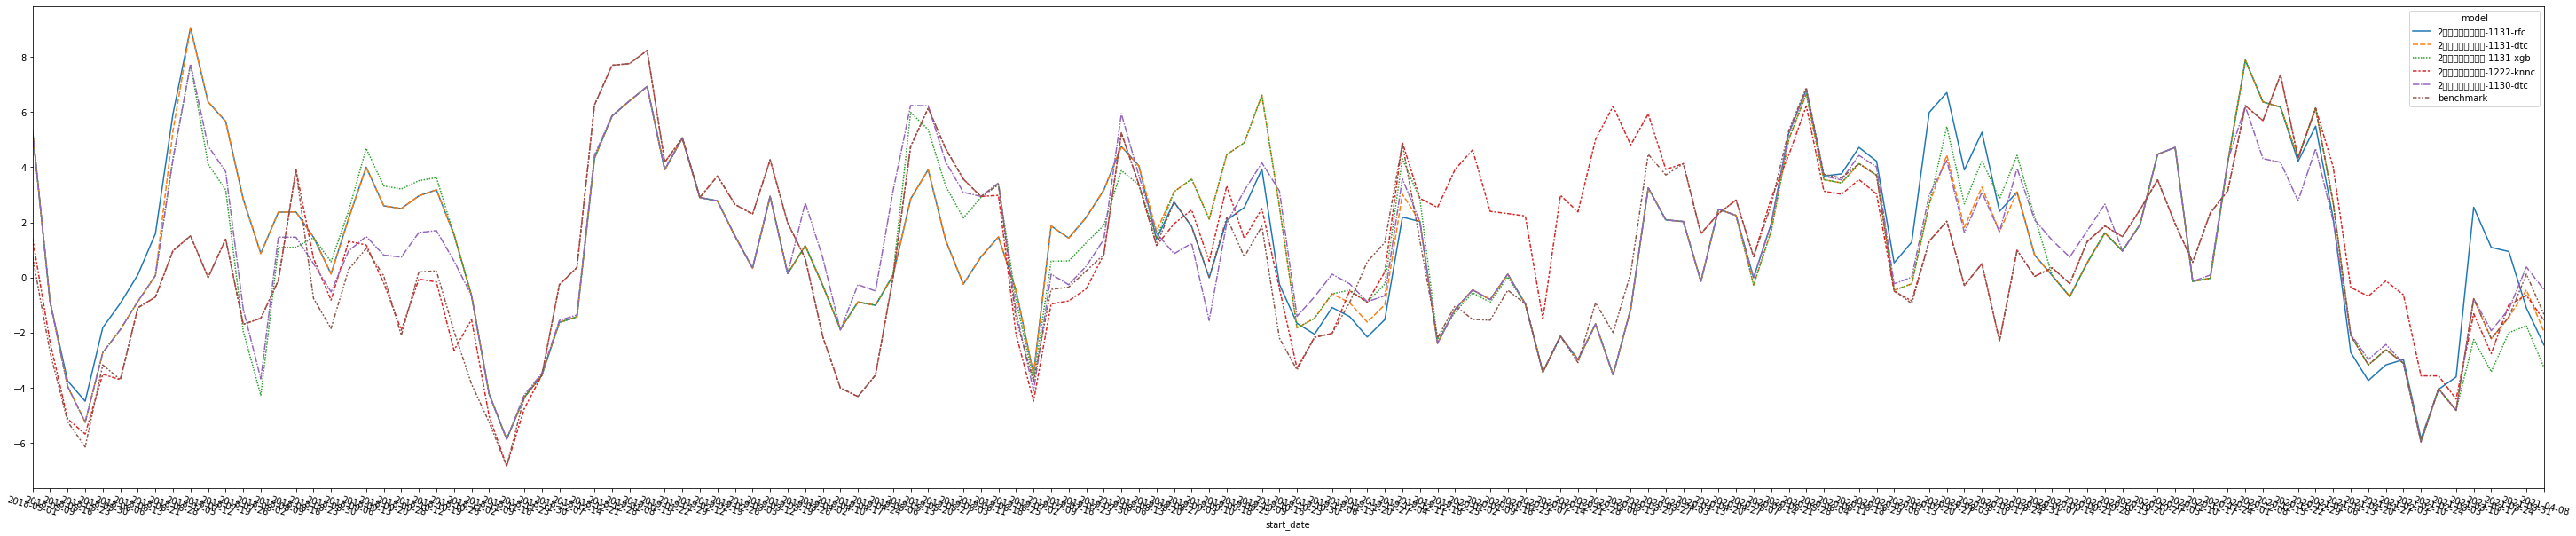

In [158]:
filter = input_data.groupby('model').agg({'value' : sum}).nlargest(5,'value')
filter['model1'] = filter.index
s = filter['model1']
s['c']= 'benchmark'
plt.figure(figsize = (15,10))
sns.lineplot(data = input_pivot[s])
# 拉长x
plt.xticks(rotation=-15)
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
N = len(input_pivot['benchmark']) # 注意此处N的值
# maxsize = max([t.get_window_extent().width for t in tl])
maxsize = 20 # 可以更改
m = 0.2  # inch margin
s = maxsize / plt.gcf().dpi * N + 2 * m
margin = m / plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left=margin, right=1. - margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])



In [156]:
s

model
2日开盘价持续下跌-1131-rfc      2日开盘价持续下跌-1131-rfc
2日开盘价持续下跌-1131-dtc      2日开盘价持续下跌-1131-dtc
2日开盘价持续下跌-1131-xgb      2日开盘价持续下跌-1131-xgb
2日开盘价持续下跌-1222-knnc    2日开盘价持续下跌-1222-knnc
2日开盘价持续下跌-1130-dtc      2日开盘价持续下跌-1130-dtc
c                                benchmark
Name: model1, dtype: object

In [ ]:
# 最优化方法
data = input_data.groupby('model').agg({'value' : sum})
print(data)
sns.displot(data = data,rug = True)